In [2]:
# %load '/Users/matthewschurman/Documents/GitHub/basePythonCode/initJupyerlab.py'
# imported pandas which helps to analyze and model data
import pandas as pd
# imported numpy which helps with mathimatical computing especialy when working with data sets
import numpy as np
# imported pyplot from matplotlib which is a software that basicly lets you visualy plot data
from matplotlib import pyplot as plt
# import os which lets you minipulate the paths and gives you more control over files
import os
# %matplotlib notebook
%matplotlib notebook

In [19]:
dirLoc = 'C:\\Users\\aaron\\Dropbox\\NewForge\\Work\\Heat_Sink_Europa\\NoAir-140.csv'
data = pd.read_csv(dirLoc)

In [20]:
data = data.drop(columns=['peak', 'airflow', 'power'])

In [21]:
a = 0
arr = [0]
rows_count = len(data.index)
for i in range(rows_count-1):
    arr.append(a)
    a+= 30
data['time'] = arr
data = data.drop(0)
data

,time,heat 1,heat 2,heat 3
1,0,26.0,26.0,26.0
2,30,26.7,26.0,26.4
3,60,27.6,27.0,27.6
4,90,28.8,28.2,29.2
5,120,30.3,29.7,30.7
6,150,31.9,31.4,32.3
7,180,33.5,32.8,34.0
8,210,35.0,34.7,35.3
9,240,36.7,36.7,37.6
10,270,38.7,38.3,39.3


<IPython.core.display.Javascript object>


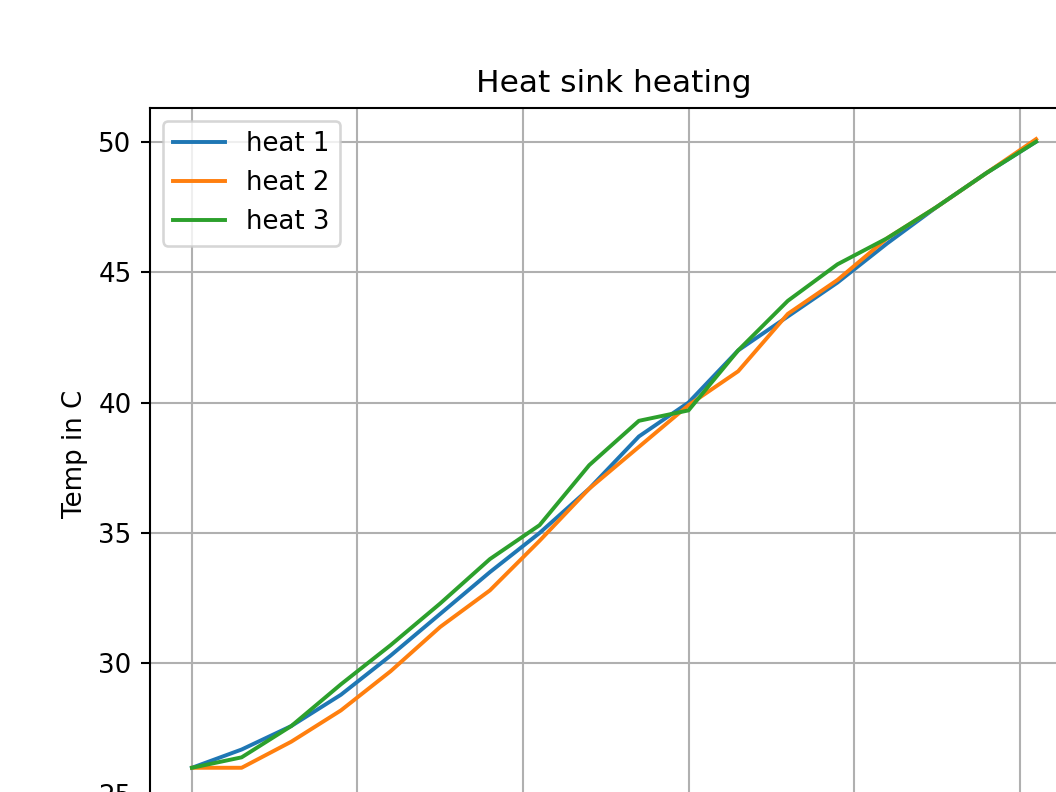

Text(0, 0.5, 'Temp in C')

In [11]:
plt.figure()
for b in data.columns[1:]:
        plt.plot(data['time'],data[b], label = b )
#plots legend 
plt.legend()
#gives the graph a grid
plt.grid()
#titels the graph
plt.title('Heat sink heating')
#labeling the x axis
plt.xlabel('Time in seconds')
#labeling the y axis
plt.ylabel('Temp in C')
        

<IPython.core.display.Javascript object>


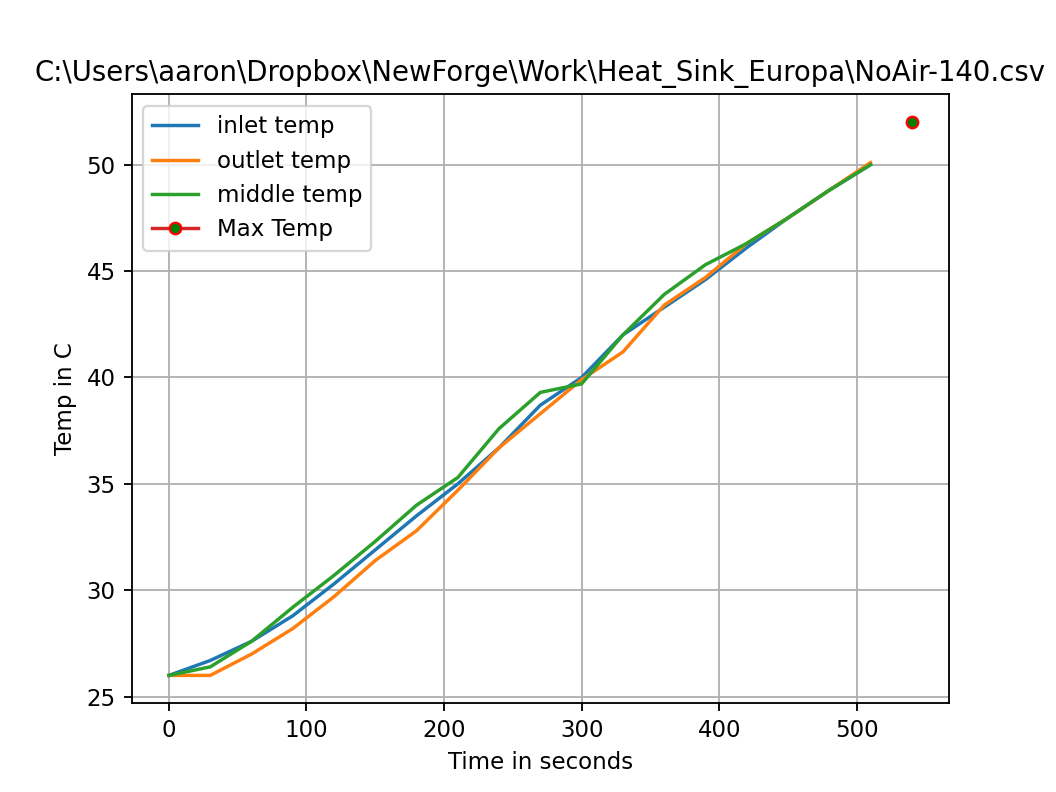

52.0


<IPython.core.display.Javascript object>


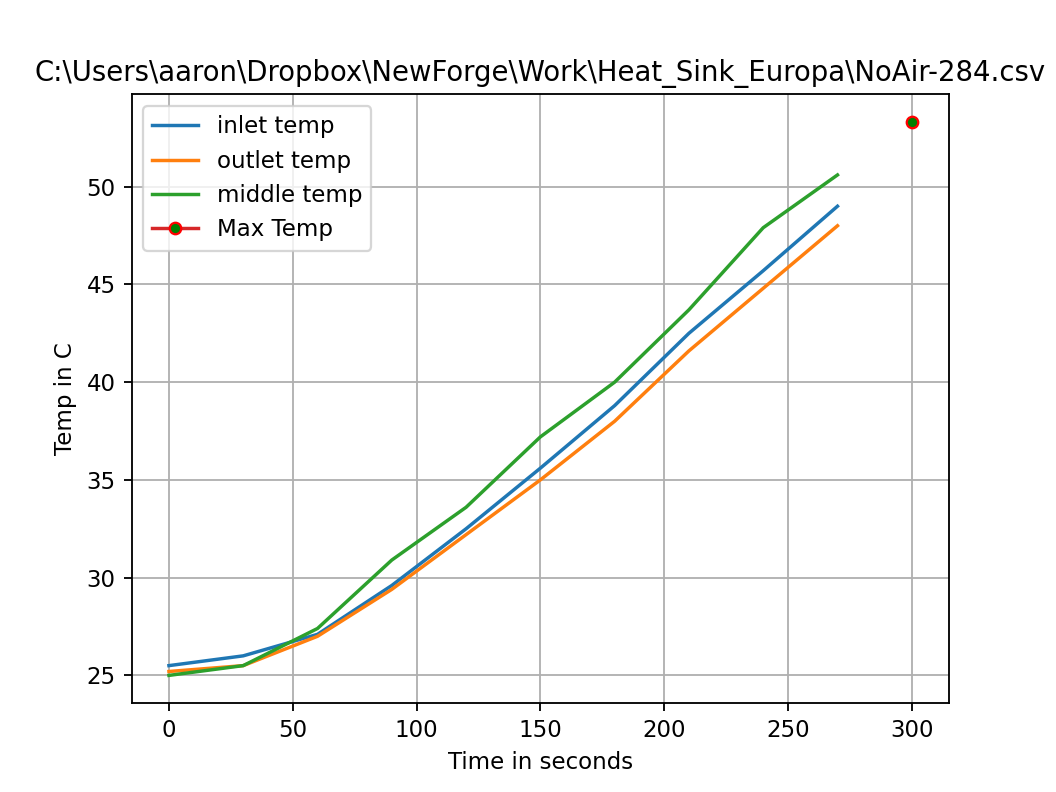

53.3


<IPython.core.display.Javascript object>


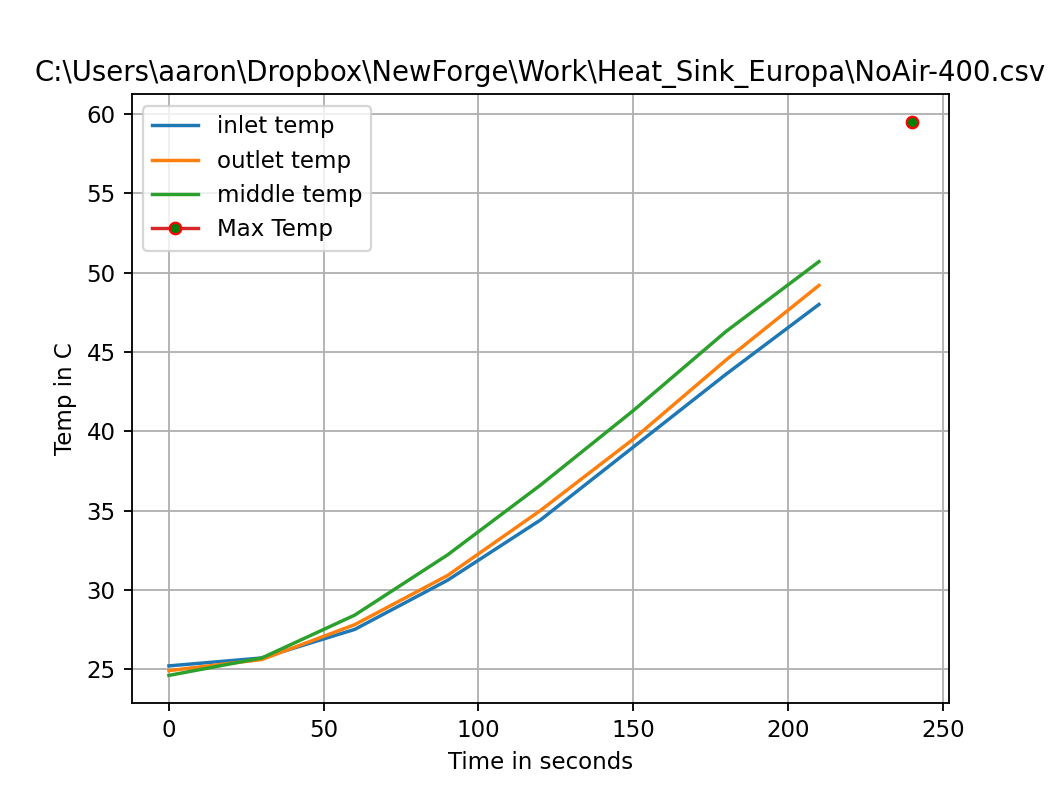

59.5


In [48]:
def makeGraph(name):
    #location where graph is
    dirLoc = 'C:\\Users\\aaron\\Dropbox\\NewForge\\Work\\Heat_Sink_Europa\\' + name
    #make pandas data frame 
    data = pd.read_csv(dirLoc)
    #get rid of unused data
    data = data.drop(columns=['peak', 'airflow', 'power'])
    a = 0
    arr = [0]
    #counts amount of rows in data
    rows_count = len(data.index)
    #data was taken every 30 seconds so this sets the time up correctly for each data point
    for i in range(rows_count-1):
        arr.append(a)
        a+= 30
    #replace time section with correct times
    data['time'] = arr
    #drop first useless row
    data = data.drop(0)
    #creats empty space for plot to go
    plt.figure()
    #titles for thermoouples on graph
    titles = ['inlet temp' , 'outlet temp', 'middle temp']
    #plots all lines with correct titles
    for (b,t) in zip(data.columns[1:], titles):
            plt.plot(data['time'],data[b], label = t )
    #creat new data frome to get peak temp
    peakData = pd.read_csv(dirLoc)
    #drop everything we dont need
    peakData = peakData.drop(columns=['heat 1','heat 2','heat 3', 'airflow', 'power'])
    #get the point
    point = peakData.iloc[1]['peak']
    #creat x,y
    x = [a]
    y = [point]
    #plot that bitch
    plt.plot(x, y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green", label = 'Max Temp')
    #plots legend 
    plt.legend()
    #gives the graph a grid
    plt.grid()
    #titels the graph
    plt.title(dirLoc)
    #labeling the x axis
    plt.xlabel('Time in seconds')
    #labeling the y axis
    plt.ylabel('Temp in C')
    save_name = name.split(".")[0]
    plt.savefig(('C:\\Users\\aaron\\Dropbox\\NewForge\\Work\\Heat_Sink_Europa\\Final_Graphs\\' + save_name) ,dpi = 400)
makeGraph('NoAir-140.csv')
makeGraph('NoAir-284.csv')
makeGraph('NoAir-400.csv')

In [9]:
##this was made becuase multiple csv file data setups were used had to account for where everything was and how it was labled
def makeGraphSilly(name):
    #location where graph is
    dirLoc = 'C:\\Users\\aaron\\Dropbox\\NewForge\\Work\\Heat_Sink_Europa\\' + name
    #make pandas data frame 
    data = pd.read_csv(dirLoc)
    data = data.drop(columns = ['power', 'airflow', 'peak'])
    #get rid of unused data
    a = 0
    arr = []
    #counts amount of rows in data
    rows_count = len(data.index)
    #data was taken every 30 seconds so this sets the time up correctly for each data point
    for i in range(rows_count):
        arr.append(a)
        a+= 30
    #replace time section with correct times
    data['time'] = arr
    #drop first useless row
    #creats empty space for plot to go
    plt.figure()
    #titles for thermoouples on graph
    titles = ['inlet temp' , 'outlet temp', 'middle temp']
    data = data.drop(0)
    #plots all lines with correct titles
    for (b,t) in zip(data.columns[1:], titles):
            plt.plot(data['time'],data[b], label = t )
    #creat new data frome to get peak temp
    peakData = pd.read_csv(dirLoc)
    #drop everything we dont need
    peakData = peakData.drop(columns=['h1','h2','h3'])
    #get the point
    point1 = peakData.iloc[1]['peak']
    point2 = peakData.iloc[2]['peak']
    point3 = peakData.iloc[3]['peak']
    #creat x,y
    x1 = [370]
    y1 = [point1]
    x2 = [1000]
    y2 = [point2]
    x3 = [1500]
    y3 = [point3]
    #plot that bitch
    plt.plot(x1, y1, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green", label = 'Max Temp 1')
    plt.margins(.25,.25)
    #plots legend 
    plt.legend()
    #gives the graph a grid
    plt.grid()
    #titels the graph
    plt.title(dirLoc)
    #labeling the x axis
    plt.xlabel('Time in seconds')
    #labeling the y axis
    plt.ylabel('Temp in C')
    save_name = name.split(".")[0]
    plt.savefig(('C:\\Users\\aaron\\Dropbox\\NewForge\\Work\\Heat_Sink_Europa\\Final_Graphs\\' + save_name) ,dpi = 400)

<IPython.core.display.Javascript object>


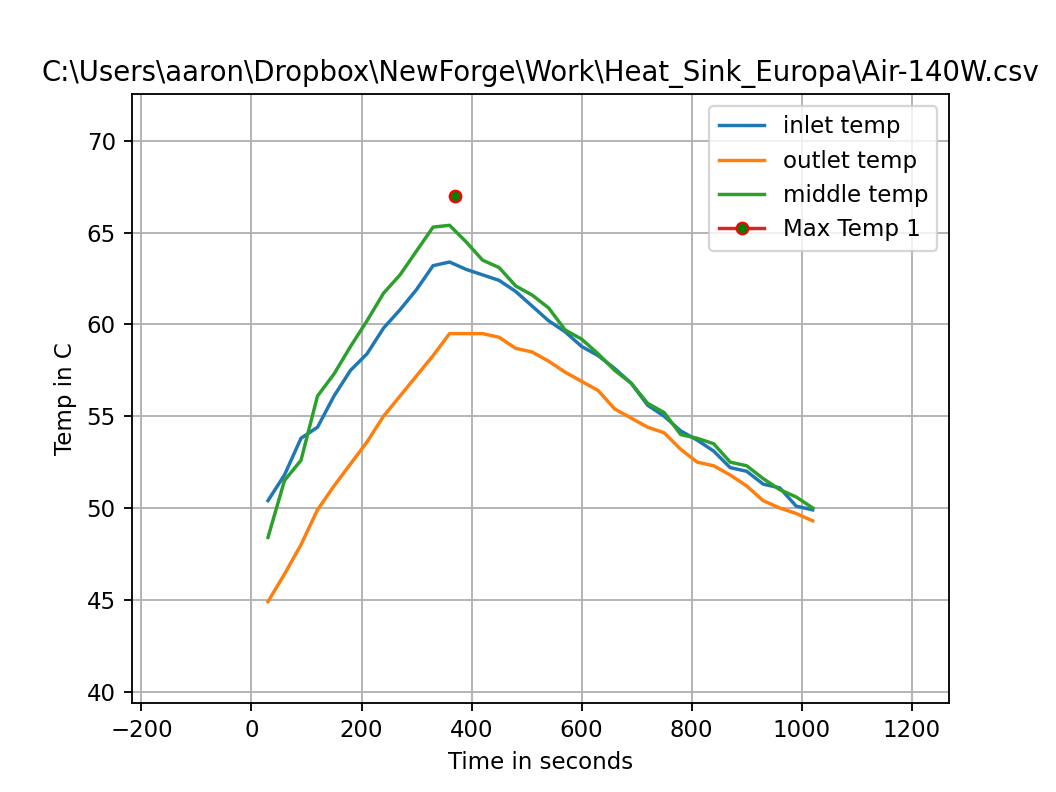

In [10]:
makeGraphSilly('Air-140W.csv')